<a href="https://colab.research.google.com/github/amodq/FDATradingStrategy/blob/main/BioTech_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract: In this project we take adavantage of the economic catalyst nature of the FDA drug approval, in order to determine optimal trading times. In addition to this, we use fundamental and technical indicators, fed into a convolutional neural net as an image, to better help us tune our entry and exit points. 


Introduction: There is another part of the market, besides crypto and meme-stocks ala Wall-Street-Bets, that can boast 300 or even 400 percent gains in a matter of days. This highly volatile world of bio-tech can thank the FDA drug approval process for its sharp upturns and downturns. The companies involved range from powerhouses such as Pfizer and Johnson and Johnson, to much smaller companies that often only have one or two drugs in development. 
These smaller companies fortunes rely on the verdict of the FDA, and as such are subject to enormous swings once the decision comes through. 

In this project, we use this as the fundamental idea. We either buy or sell the
bio-tech stock based on whether the approval catalyst is on the calendar. We then use the second core idea of the project to implement the strategy, the convolutional neural net.

My partner and I, saw an article on Towards Data Science, that used technical data, transformed it into a grayscale image, then fed it into the convulutional neural net to classify it either as a buy, sell or a hold. We applied their idea to their dataset, and used the model to find the optimal buy and sell dates a month after the catalyst date. 

Review of Existing Literature:
In the literature, we did not find much in the way of strategy specifically geared towards trading in the biotech space. A lot of the fundamental papers, were either focused on the sector as a whole or a specific stock, not a strategy specifically geared around the bio-tech space.

Some of the inspiration for the biotech side of the project came years ago while watching a technical analysis youtube video, then the author mentions catalysts to trade off of such as election results, commodities news, and FDA bio-tech approvals. 

As for the machine learning aspect, we drew heavily from the both the original paper and the towards data science webpage and github repo (sources will be at the end). We also the keras and pandas packages for implementation.


Dataset: We used the FDA drug approval csvs from their publicly available data site, and the yfinance package introduced in the homework. We used the FDA's data because we trying to get data on a FDA process, the approvals. The drug data itself did not need much cleaning, as there are no outliers with a drug being approved. The stock data also did not need any cleaning, because yfinance is very reliable, and we needed all the stock data we could get for training the neural network. Yfinance was used over other securities apis because of its high rate limit scheme, and the fact that it was free. 

We did exploratory analysis to determine how many years of data to collect and train on, and whether this project was even feasible. The fact that biotech stocks usually rise and fall after their catalysts, as evidenced by the graphs below, shows the potential for this project. 


Methods: We made a model in order to predict optimal buy/sell times for a short over a small window of time. This was heavily based off of the paper "Algorithmic Financial Trading with Deep Convolutional Neural Networks: Time Series to Image Conversion Approach" and Asutosh Nayak's implementation of it. To summarize, treating technical indicators and the time remaining until approval date as pixel values of an image, we can apply a CNN to give an array of confidence values for buy, sell, and hold. Due to a lack of proper hyperparameter tuning and an abundance of hold data over buy and sell, the model prefers to hold every single time. However, we can still implement a strategy by using certain thresholds for buy and sell (for example, if the model's confidence is above .3 for buy, then buy). A strategy is implemented that does this and uses some limits on how many times we can buy each stock. For further work, more hyperparameter tuning / testing of different CNN models / nuanced strategies could be tested. 


Results:#not yet
Conclusion:#after done

In [240]:
import numpy as np
import pandas as pd
from re import search
import yfinance as yf
import datetime as dt
from stockstats import StockDataFrame as sdf
from ta import *
from ta.momentum import *
from ta.trend import *
from ta.volume import *
from ta.others import *
from ta.volatility import *
import time
from tqdm import tqdm

In [241]:
# Grab ticker dict
tickerDict = {}
with open("NYSE.txt", mode='r') as nyse:
  linesn = nyse.readlines()
for line in linesn:
  line = line[:len(line)-1]
  arr = line.split("\t", 1)
  arr[1] = arr[1].upper()
  tickerDict[arr[1]] = arr[0];
with open("NASDAQ.txt", mode='r') as nas:
  linesn = nas.readlines()
for line in linesn:
  line = line[:len(line)-1]
  arr = line.split("\t", 1)
  arr[1] = arr[1].upper()
  tickerDict[arr[1]] = arr[0];

In [13]:
## This is the code that goes from company name to ticker symbol with time indexing

#csv = pd.read_csv('FDA_2019/DrugsFDA FDA-Approved Drugs (1).csv')
csv = pd.read_csv('data/combined.csv', error_bad_lines=False, engine="python")

#factors = pd.read_csv('FDA_2019/DrugsFDA FDA-Approved Drugs (1).csv')['Company']

#for index, value in factors.items():
#    for key in tickerDict.keys():
#        if search(value, key):
#            print(value, key)

csv['year'] = csv['Approval Date'].str[6:10]
csv['month'] = csv['Approval Date'].str[3:5]
csv['day'] = csv['Approval Date'].str[0:2]
x = pd.to_datetime(csv['Approval Date'])
csv.index = x

names = csv['Company']

toremove = []

for i in tqdm(range(names.shape[0])):
    found = False
    for key in tickerDict.keys():
        if search(names.iloc[i], key):
            names.iloc[i] = tickerDict[key]
            found = True
            break
    if not found:
        toremove.append(names.iloc[i])

print(names.head())
            
df = pd.concat([csv['Approval Date'], names], axis=1)
df = df.loc[df["Company"].isin(toremove) == False]
df = df.drop_duplicates()
df.head()

Skipping line 342: ',' expected after '"'
Skipping line 1180: ',' expected after '"'
Skipping line 1951: ',' expected after '"'
Skipping line 2470: ',' expected after '"'
Skipping line 2802: ',' expected after '"'
Skipping line 3067: ',' expected after '"'
Skipping line 3507: ',' expected after '"'
Skipping line 3991: ',' expected after '"'
Skipping line 4216: ',' expected after '"'
Skipping line 4634: ',' expected after '"'
Skipping line 5088: ',' expected after '"'
Skipping line 5577: ',' expected after '"'
Skipping line 5761: ',' expected after '"'
Skipping line 6131: ',' expected after '"'
Skipping line 6572: ',' expected after '"'
Skipping line 6923: ',' expected after '"'
Skipping line 7156: ',' expected after '"'
Skipping line 7437: ',' expected after '"'
Skipping line 7739: ',' expected after '"'
Skipping line 8047: ',' expected after '"'
Skipping line 8384: ',' expected after '"'
Skipping line 8722: ',' expected after '"'
Skipping line 8966: ',' expected after '"'
Skipping lin

Approval Date
2019-01-02       DR REDDYS LABS SA
2019-01-02    AUROBINDO PHARMA LTD
2019-01-02    AUROBINDO PHARMA LTD
2019-01-02      ALEMBIC PHARMS LTD
2019-01-02     ALIGNSCIENCE PHARMA
Name: Company, dtype: object


,Approval Date,Company
Approval Date,,
2019-01-04,01/04/2019,NVS
2019-01-04,01/04/2019,CTLT
2019-01-07,01/07/2019,GSK
2019-01-10,01/10/2019,NVS
2019-01-10,01/10/2019,NBIX


In [14]:
#CHECKPOINT
df.to_csv('approvaldates.csv')
print(df)

              Approval Date Company
Approval Date                      
2019-01-04       01/04/2019     NVS
2019-01-04       01/04/2019    CTLT
2019-01-07       01/07/2019     GSK
2019-01-10       01/10/2019     NVS
2019-01-10       01/10/2019    NBIX
...                     ...     ...
2020-04-29       04/29/2020     NVS
2020-04-29       04/29/2020    CTVA
2020-04-29       04/29/2020     GSK
2020-04-30       04/30/2020     SNY
2020-04-30       04/30/2020    AMGN

[2303 rows x 2 columns]


In [235]:
df = pd.read_csv('approvaldates.csv', error_bad_lines=False, engine="python")

c:\users\sukisha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [236]:
# taken from  nayash / stock_cnn_blog_pub
# using a rolling window, desired buy/sell points are labeled based on minima/maxima

def create_labels(df, col_name, window_size=11):
        """
        Data is labeled as per the logic in research paper
        Label code : BUY => 1, SELL => 0, HOLD => 2
        params :
            df => Dataframe with data
            col_name => name of column which should be used to determine strategy
        returns : numpy array with integer codes for labels with
                  size = total-(window_size)+1
        """

        row_counter = 0
        total_rows = len(df)
        labels = np.zeros(total_rows)
        labels[:] = np.nan

        while row_counter < total_rows:
            if row_counter >= window_size - 1:
                window_begin = row_counter - (window_size - 1)
                window_end = row_counter
                window_middle = (int)((window_begin + window_end) / 2)
                
                min_ = np.inf
                min_index = -1
                max_ = -np.inf
                max_index = -1
                for i in range(window_begin, window_end + 1):
                    price = df.iloc[i][col_name]
                    if price < min_:
                        min_ = price
                        min_index = i
                    if price > max_:
                        max_ = price
                        max_index = i

                if max_index == window_middle:
                    labels[window_middle] = 0
                elif min_index == window_middle:
                    labels[window_middle] = 1
                else:
                    labels[window_middle] = 2

            row_counter = row_counter + 1

        return labels

In [237]:
# wrappers taken from  nayash / stock_cnn_blog_pub
# these wrappers edit the dataframe to add TAs

def get_SMA(df, col_name, intervals):
    """
    Momentum indicator
    """
    stime = time.time()
    #print("Calculating SMA")
    df_ss = sdf.retype(df)
    for i in intervals:
        df[col_name + '_sma_' + str(i)] = df_ss[col_name + '_' + str(i) + '_sma']

def get_EMA(df, col_name, intervals):
    """
    Needs validation
    Momentum indicator
    """
    stime = time.time()
    #print("Calculating EMA")
    df_ss = sdf.retype(df)
    for i in intervals:
        df['ema_' + str(i)] = df_ss[col_name + '_' + str(i) + '_ema']
        del df[col_name + '_' + str(i) + '_ema']
        # df["ema_"+str(intervals[0])+'_1'] = ema_indicator(df['close'], i, fillna=True)

def get_TRIX(df, col_name, intervals):
    """
    TA lib actually calculates percent rate of change of a triple exponentially
    smoothed moving average not Triple EMA.
    Momentum indicator
    Need validation!
    """
    stime = time.time()
    #print("Calculating TRIX")
    df_ss = sdf.retype(df)
    for i in intervals:
        # df['trix_'+str(i)] = df_ss['trix_'+str(i)+'_sma']
        df['trix_' + str(i)] = trix(df['close'], i, fillna=True)

    # df.drop(columns=['trix','trix_6_sma',])

def get_EOM(df, col_name, intervals):
    """
    An Oscillator type indicator and volume type
    Ease of Movement : https://www.investopedia.com/terms/e/easeofmovement.asp
    """
    stime = time.time()
    #print("Calculating EOM")
    for i in intervals:
        df['eom_' + str(i)] = ease_of_movement(df['high'], df['low'], df['volume'], n=i, fillna=True)

def get_kst(df, col_name, intervals):
    """
    Trend Oscillator type indicator
    """

    stime = time.time()
    #print("Calculating KST")
    for i in intervals:
        df['kst_' + str(i)] = kst(df['close'], i)

def get_force_index(df, intervals):
    stime = time.time()
    #print("Calculating Force Index")
    for i in intervals:
        df['fi_' + str(i)] = force_index(df['close'], df['volume'], 5, fillna=True)

#
def get_RSI_smooth(df, col_name, intervals):
    """
    Momentum indicator
    As per https://www.investopedia.com/terms/r/rsi.asp
    RSI_1 = 100 - (100/ (1 + (avg gain% / avg loss%) ) )
    RSI_2 = 100 - (100/ (1 + (prev_avg_gain*13+avg gain% / prev_avg_loss*13 + avg loss%) ) )
    E.g. if period==6, first RSI starts from 7th index because difference of first row is NA
    http://cns.bu.edu/~gsc/CN710/fincast/Technical%20_indicators/Relative%20Strength%20Index%20(RSI).htm
    https://school.stockcharts.com/doku.php?id=technical_indicators:relative_strength_index_rsi
    Verified!
    """

    #print("Calculating RSI")
    stime = time.time()
    prev_rsi = np.inf
    prev_avg_gain = np.inf
    prev_avg_loss = np.inf
    rolling_count = 0

    def calculate_RSI(series, period):
        # nonlocal rolling_count
        nonlocal prev_avg_gain
        nonlocal prev_avg_loss
        nonlocal rolling_count

        # num_gains = (series >= 0).sum()
        # num_losses = (series < 0).sum()
        # sum_gains = series[series >= 0].sum()
        # sum_losses = np.abs(series[series < 0].sum())
        curr_gains = series.where(series >= 0, 0)  # replace 0 where series not > 0
        curr_losses = np.abs(series.where(series < 0, 0))
        avg_gain = curr_gains.sum() / period  # * 100
        avg_loss = curr_losses.sum() / period  # * 100
        rsi = -1

        if rolling_count == 0:
            # first RSI calculation
            rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
            # print(rolling_count,"rs1=",rs, rsi)
        else:
            # smoothed RSI
            # current gain and loss should be used, not avg_gain & avg_loss
            rsi = 100 - (100 / (1 + ((prev_avg_gain * (period - 1) + curr_gains.iloc[-1]) /
                                     (prev_avg_loss * (period - 1) + curr_losses.iloc[-1]))))
            # print(rolling_count,"rs2=",rs, rsi)

        # df['rsi_'+str(period)+'_own'][period + rolling_count] = rsi
        rolling_count = rolling_count + 1
        prev_avg_gain = avg_gain
        prev_avg_loss = avg_loss
        return rsi

    diff = df[col_name].diff()[1:]  # skip na
    for period in intervals:
        df['rsi_' + str(period)] = np.nan
        # df['rsi_'+str(period)+'_own_1'] = np.nan
        rolling_count = 0
        res = diff.rolling(period).apply(calculate_RSI, args=(period,), raw=False)
        df['rsi_' + str(period)][1:] = res

    # df.drop(['diff'], axis = 1, inplace=True)



In [238]:
# test TAs
dates = pd.to_datetime(df['Approval Date'])

ticker = yf.Ticker("NVS")
hist = ticker.history( start=dates.iloc[0] - dt.timedelta(7*6), end=dates.iloc[0] + dt.timedelta(7*4))
hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
hist['TimeToApproval'] = (dates.iloc[0] - hist.index).days
hist['Labels'] = create_labels(hist, 'Open')

hist.columns = map(str.lower, hist.columns)


get_SMA(hist, 'open', [9,25])
get_EMA(hist, 'close', [15])
get_kst(hist, 'close', [13,18])
get_RSI_smooth(hist, 'close', [6])
get_TRIX(hist, 'close', [12, 22])
get_force_index(hist, [21, 25])

del hist['open' + '_9_sma']
del hist['open' + '_25_sma']

hist = hist.dropna()
print(hist.shape)

(27, 17)


C:\Users\sukisha\AppData\Local\Temp/ipykernel_11248/3338743586.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi_' + str(period)][1:] = res


In [239]:
# create df for each ticker by first grabbing yfinance data, making TAs, and labelling 
finaldf = hist

for i in tqdm(range(df.shape[0])):
    if (i != 0):
        try:
            ticker = yf.Ticker(df['Company'].iloc[i])
            hist = ticker.history( start=dates.iloc[i] - dt.timedelta(7*6), end=dates.iloc[i] + dt.timedelta(7*4))
            hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
            hist['TimeToApproval'] = (dates.iloc[i] - hist.index).days
            hist['Labels'] = create_labels(hist, 'Open')
            
            hist.columns = map(str.lower, hist.columns)

            get_SMA(hist, 'open', [9,25])
            get_EMA(hist, 'close', [15])
            get_kst(hist, 'close', [13,18])
            get_RSI_smooth(hist, 'close', [6])
            get_TRIX(hist, 'close', [12, 22])
            get_force_index(hist, [21, 25])
            
            del hist['open' + '_9_sma']
            del hist['open' + '_25_sma']
            
            hist = hist.dropna()
            finaldf = pd.concat([finaldf,hist], ignore_index=True)

        except:
            print("Yfinance error")


  0%|          | 0/2303 [00:00<?, ?it/s]C:\Users\sukisha\AppData\Local\Temp/ipykernel_11248/3338743586.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi_' + str(period)][1:] = res
  1%|          | 12/2303 [00:02<07:39,  4.99it/s]

- SCPL: Data doesn't exist for startDate = 1543910400, endDate = 1549958400
Yfinance error


  1%|          | 18/2303 [00:03<06:38,  5.73it/s]

- AMAM: Data doesn't exist for startDate = 1544169600, endDate = 1550217600
Yfinance error
- SCPL: Data doesn't exist for startDate = 1544169600, endDate = 1550217600
Yfinance error


  1%|          | 27/2303 [00:05<06:36,  5.74it/s]

- SCPL: Data doesn't exist for startDate = 1544774400, endDate = 1550822400
Yfinance error
- IPHA: Data doesn't exist for startDate = 1544774400, endDate = 1550822400
Yfinance error


  2%|▏         | 35/2303 [00:07<08:25,  4.49it/s]

- OGN: Data doesn't exist for startDate = 1566457200, endDate = 1572505200
Yfinance error


  2%|▏         | 38/2303 [00:08<07:31,  5.02it/s]

- OGN: Data doesn't exist for startDate = 1566543600, endDate = 1572591600
Yfinance error


  2%|▏         | 43/2303 [00:09<07:45,  4.85it/s]

- BMA.U: No data found, symbol may be delisted
Yfinance error


  3%|▎         | 78/2303 [00:19<08:23,  4.42it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


  3%|▎         | 80/2303 [00:19<07:16,  5.09it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


  4%|▍         | 94/2303 [00:22<08:11,  4.49it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


  4%|▍         | 99/2303 [00:24<08:03,  4.55it/s]

- OGN: Data doesn't exist for startDate = 1569481200, endDate = 1575532800
Yfinance error


  5%|▍         | 113/2303 [00:27<08:26,  4.32it/s]

- PANA: Data doesn't exist for startDate = 1570431600, endDate = 1576483200
Yfinance error


  5%|▌         | 125/2303 [00:30<07:32,  4.82it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


  7%|▋         | 162/2303 [00:40<07:48,  4.57it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


  7%|▋         | 166/2303 [00:40<07:00,  5.09it/s]

- OGN: Data doesn't exist for startDate = 1573113600, endDate = 1579161600
Yfinance error


  7%|▋         | 172/2303 [00:42<07:41,  4.62it/s]

- AMYT: Data doesn't exist for startDate = 1573200000, endDate = 1579248000
Yfinance error


  8%|▊         | 182/2303 [00:44<07:17,  4.85it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


  8%|▊         | 187/2303 [00:46<07:19,  4.81it/s]

- SCPL: Data doesn't exist for startDate = 1545724800, endDate = 1551772800
Yfinance error


  9%|▉         | 208/2303 [00:51<07:51,  4.44it/s]

- SCPL: Data doesn't exist for startDate = 1547193600, endDate = 1553238000
Yfinance error


  9%|▉         | 215/2303 [00:52<06:14,  5.57it/s]

- OGN: Data doesn't exist for startDate = 1547798400, endDate = 1553842800
Yfinance error
- CTVA: Data doesn't exist for startDate = 1547798400, endDate = 1553842800
Yfinance error


 10%|▉         | 221/2303 [00:54<05:59,  5.79it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CTVA: Data doesn't exist for startDate = 1548576000, endDate = 1554620400
Yfinance error


 10%|▉         | 224/2303 [00:54<06:15,  5.54it/s]

- SCPL: Data doesn't exist for startDate = 1548662400, endDate = 1554706800
Yfinance error


 10%|▉         | 228/2303 [00:55<07:14,  4.78it/s]

- CHNG: Data doesn't exist for startDate = 1548748800, endDate = 1554793200
Yfinance error


 10%|▉         | 230/2303 [00:56<06:34,  5.25it/s]

- OGN: Data doesn't exist for startDate = 1549008000, endDate = 1555052400
Yfinance error


 10%|█         | 237/2303 [00:57<07:26,  4.62it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 10%|█         | 241/2303 [00:58<06:41,  5.14it/s]

- SCPL: Data doesn't exist for startDate = 1549958400, endDate = 1556002800
Yfinance error


 11%|█         | 250/2303 [01:00<07:55,  4.31it/s]

- OGN: Data doesn't exist for startDate = 1550563200, endDate = 1556607600
Yfinance error


 11%|█         | 258/2303 [01:02<07:36,  4.48it/s]

- ACI.S: No data found, symbol may be delisted
Yfinance error


 12%|█▏        | 270/2303 [01:05<07:31,  4.50it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 12%|█▏        | 285/2303 [01:09<06:47,  4.95it/s]

- CTVA: Data doesn't exist for startDate = 1552633200, endDate = 1558681200
Yfinance error


 13%|█▎        | 291/2303 [01:10<07:00,  4.79it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 13%|█▎        | 298/2303 [01:12<07:39,  4.36it/s]

- AMAM: Data doesn't exist for startDate = 1553670000, endDate = 1559718000
Yfinance error


 13%|█▎        | 300/2303 [01:12<06:35,  5.06it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 13%|█▎        | 310/2303 [01:15<07:21,  4.52it/s]

- ATH.U: No data found, symbol may be delisted
Yfinance error


 15%|█▍        | 335/2303 [01:21<06:33,  5.00it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 15%|█▍        | 345/2303 [01:24<07:12,  4.52it/s]

- ACI.S: No data found, symbol may be delisted
Yfinance error


 16%|█▌        | 369/2303 [01:30<07:22,  4.37it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 16%|█▌        | 374/2303 [01:31<07:02,  4.56it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 17%|█▋        | 401/2303 [01:38<07:52,  4.03it/s]

- AHL-C: No data found, symbol may be delisted
Yfinance error


 18%|█▊        | 404/2303 [01:39<07:12,  4.39it/s]

- OGN: Data doesn't exist for startDate = 1561964400, endDate = 1568012400
Yfinance error


 18%|█▊        | 411/2303 [01:41<06:32,  4.81it/s]

- OGN: Data doesn't exist for startDate = 1562310000, endDate = 1568358000
Yfinance error


 18%|█▊        | 416/2303 [01:42<06:29,  4.84it/s]

- CLI.S: No data found, symbol may be delisted
Yfinance error


 20%|█▉        | 458/2303 [01:53<06:50,  4.49it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 20%|██        | 462/2303 [01:54<06:24,  4.79it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 21%|██        | 475/2303 [01:58<06:41,  4.55it/s]

- ATH.U: No data found, symbol may be delisted
Yfinance error


 21%|██        | 481/2303 [01:59<06:35,  4.61it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 21%|██        | 489/2303 [02:01<06:38,  4.55it/s]

- AMRX: Data doesn't exist for startDate = 1512720000, endDate = 1518768000
Yfinance error


 22%|██▏       | 497/2303 [02:03<05:42,  5.27it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- SCPL: Data doesn't exist for startDate = 1513324800, endDate = 1519372800
Yfinance error


 22%|██▏       | 500/2303 [02:04<05:35,  5.37it/s]

- SCPL: Data doesn't exist for startDate = 1513584000, endDate = 1519632000
Yfinance error


 22%|██▏       | 508/2303 [02:06<06:41,  4.47it/s]

- OGN: Data doesn't exist for startDate = 1535698800, endDate = 1541750400
Yfinance error


 22%|██▏       | 517/2303 [02:08<06:44,  4.42it/s]

- CTVA: Data doesn't exist for startDate = 1536217200, endDate = 1542268800
Yfinance error


 23%|██▎       | 524/2303 [02:10<06:12,  4.78it/s]

- SCPL: Data doesn't exist for startDate = 1536649200, endDate = 1542700800
Yfinance error


 23%|██▎       | 530/2303 [02:11<05:58,  4.94it/s]

- SCPL: Data doesn't exist for startDate = 1536908400, endDate = 1542960000
Yfinance error


 24%|██▍       | 549/2303 [02:16<05:30,  5.31it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CHNG: Data doesn't exist for startDate = 1537945200, endDate = 1543996800
Yfinance error


 24%|██▍       | 553/2303 [02:17<06:05,  4.78it/s]

- SCPL: Data doesn't exist for startDate = 1538118000, endDate = 1544169600
Yfinance error


 24%|██▍       | 558/2303 [02:18<06:11,  4.70it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 25%|██▌       | 584/2303 [02:25<06:27,  4.44it/s]

- SCPL: Data doesn't exist for startDate = 1540450800, endDate = 1546502400
Yfinance error


 25%|██▌       | 587/2303 [02:25<05:19,  5.36it/s]

- SCPL: Data doesn't exist for startDate = 1540537200, endDate = 1546588800
Yfinance error
- FNB-E: No data found, symbol may be delisted
Yfinance error


 26%|██▌       | 600/2303 [02:29<06:30,  4.36it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 26%|██▋       | 607/2303 [02:30<05:31,  5.11it/s]

- CTVA: Data doesn't exist for startDate = 1541664000, endDate = 1547712000
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 27%|██▋       | 615/2303 [02:32<06:38,  4.23it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 27%|██▋       | 617/2303 [02:33<05:32,  5.07it/s]

- SCPL: Data doesn't exist for startDate = 1541750400, endDate = 1547798400
Yfinance error


 27%|██▋       | 621/2303 [02:34<05:20,  5.24it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 27%|██▋       | 632/2303 [02:36<05:49,  4.78it/s]

- OGN: Data doesn't exist for startDate = 1514275200, endDate = 1520323200
Yfinance error


 28%|██▊       | 638/2303 [02:38<05:04,  5.46it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- OGN: Data doesn't exist for startDate = 1514534400, endDate = 1520582400
Yfinance error


 28%|██▊       | 640/2303 [02:38<04:02,  6.84it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- AMRX: Data doesn't exist for startDate = 1514534400, endDate = 1520582400
Yfinance error


 28%|██▊       | 642/2303 [02:38<04:40,  5.93it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 28%|██▊       | 646/2303 [02:39<04:32,  6.08it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- AMRX: Data doesn't exist for startDate = 1515052800, endDate = 1521097200
Yfinance error


 28%|██▊       | 653/2303 [02:41<06:23,  4.30it/s]

- OGN: Data doesn't exist for startDate = 1516176000, endDate = 1522220400
Yfinance error


 29%|██▊       | 658/2303 [02:42<06:07,  4.48it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 29%|██▉       | 664/2303 [02:44<06:09,  4.43it/s]

- SCPL: Data doesn't exist for startDate = 1516867200, endDate = 1522911600
Yfinance error


 29%|██▉       | 670/2303 [02:45<06:02,  4.50it/s]

- CTVA: Data doesn't exist for startDate = 1517385600, endDate = 1523430000
Yfinance error


 29%|██▉       | 673/2303 [02:46<05:46,  4.71it/s]

- CTVA: Data doesn't exist for startDate = 1517558400, endDate = 1523602800
Yfinance error


 29%|██▉       | 675/2303 [02:46<05:30,  4.93it/s]

- AMRX: Data doesn't exist for startDate = 1517817600, endDate = 1523862000
Yfinance error


 30%|██▉       | 682/2303 [02:48<05:06,  5.29it/s]

- OGN: Data doesn't exist for startDate = 1518163200, endDate = 1524207600
Yfinance error
- OGN: Data doesn't exist for startDate = 1518422400, endDate = 1524466800
Yfinance error


 30%|███       | 697/2303 [02:52<05:08,  5.20it/s]

- CTVA: Data doesn't exist for startDate = 1519632000, endDate = 1525676400
Yfinance error
- OGN: Data doesn't exist for startDate = 1519718400, endDate = 1525762800
Yfinance error


 30%|███       | 702/2303 [02:53<05:29,  4.87it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 31%|███       | 705/2303 [02:53<04:34,  5.82it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CHNG: Data doesn't exist for startDate = 1520323200, endDate = 1526367600
Yfinance error


 31%|███       | 711/2303 [02:55<06:06,  4.35it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 31%|███       | 714/2303 [02:56<05:45,  4.59it/s]

- OGN: Data doesn't exist for startDate = 1520496000, endDate = 1526540400
Yfinance error


 31%|███       | 717/2303 [02:56<05:47,  4.56it/s]

- SCPL: Data doesn't exist for startDate = 1520582400, endDate = 1526626800
Yfinance error


 32%|███▏      | 726/2303 [02:59<04:59,  5.27it/s]

- CHNG: Data doesn't exist for startDate = 1521097200, endDate = 1527145200
Yfinance error
- SCPL: Data doesn't exist for startDate = 1521183600, endDate = 1527231600
Yfinance error


 32%|███▏      | 734/2303 [03:01<05:31,  4.73it/s]

- SCPL: Data doesn't exist for startDate = 1521788400, endDate = 1527836400
Yfinance error


 32%|███▏      | 739/2303 [03:02<04:38,  5.62it/s]

- CTVA: Data doesn't exist for startDate = 1522652400, endDate = 1528700400
Yfinance error
- ACI.S: No data found, symbol may be delisted
Yfinance error


 32%|███▏      | 741/2303 [03:02<04:35,  5.67it/s]

- SCPL: Data doesn't exist for startDate = 1522652400, endDate = 1528700400
Yfinance error


 32%|███▏      | 748/2303 [03:04<05:39,  4.58it/s]

- ATH.U: No data found, symbol may be delisted
Yfinance error


 33%|███▎      | 751/2303 [03:04<05:14,  4.94it/s]

- OSMT: Data doesn't exist for startDate = 1523257200, endDate = 1529305200
Yfinance error


 33%|███▎      | 763/2303 [03:08<05:57,  4.31it/s]

- AMYT: Data doesn't exist for startDate = 1524466800, endDate = 1530514800
Yfinance error


 34%|███▍      | 778/2303 [03:12<05:29,  4.62it/s]

- SCPL: Data doesn't exist for startDate = 1525158000, endDate = 1531206000
Yfinance error


 34%|███▍      | 780/2303 [03:12<04:52,  5.20it/s]

- SCPL: Data doesn't exist for startDate = 1525417200, endDate = 1531465200
Yfinance error


 34%|███▍      | 783/2303 [03:13<05:03,  5.01it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 34%|███▍      | 787/2303 [03:13<04:58,  5.08it/s]

- SCPL: Data doesn't exist for startDate = 1525762800, endDate = 1531810800
Yfinance error


 34%|███▍      | 792/2303 [03:14<04:31,  5.56it/s]

- OGN: Data doesn't exist for startDate = 1526022000, endDate = 1532070000
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 35%|███▍      | 795/2303 [03:15<04:50,  5.20it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 35%|███▍      | 798/2303 [03:16<04:37,  5.41it/s]

- DERM: Data doesn't exist for startDate = 1526540400, endDate = 1532588400
Yfinance error


 35%|███▍      | 802/2303 [03:17<04:53,  5.11it/s]

- SCPL: Data doesn't exist for startDate = 1526886000, endDate = 1532934000
Yfinance error


 35%|███▌      | 812/2303 [03:19<04:48,  5.16it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- SCPL: Data doesn't exist for startDate = 1527750000, endDate = 1533798000
Yfinance error


 35%|███▌      | 815/2303 [03:20<04:37,  5.36it/s]

- SCPL: Data doesn't exist for startDate = 1528095600, endDate = 1534143600
Yfinance error


 37%|███▋      | 842/2303 [03:27<05:31,  4.41it/s]

- SCPL: Data doesn't exist for startDate = 1529650800, endDate = 1535698800
Yfinance error


 37%|███▋      | 846/2303 [03:28<05:03,  4.81it/s]

- SCPL: Data doesn't exist for startDate = 1530169200, endDate = 1536217200
Yfinance error


 37%|███▋      | 857/2303 [03:31<05:24,  4.46it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 38%|███▊      | 868/2303 [03:34<05:55,  4.03it/s]

- CTVA: Data doesn't exist for startDate = 1531983600, endDate = 1538031600
Yfinance error


 38%|███▊      | 873/2303 [03:36<05:44,  4.15it/s]

- SCPL: Data doesn't exist for startDate = 1532674800, endDate = 1538722800
Yfinance error


 38%|███▊      | 875/2303 [03:36<05:04,  4.69it/s]

- IPHA: Data doesn't exist for startDate = 1533193200, endDate = 1539241200
Yfinance error


 38%|███▊      | 879/2303 [03:37<05:08,  4.61it/s]

- CTVA: Data doesn't exist for startDate = 1533625200, endDate = 1539673200
Yfinance error


 38%|███▊      | 882/2303 [03:37<04:09,  5.69it/s]

- CHNG: Data doesn't exist for startDate = 1533711600, endDate = 1539759600
Yfinance error
- SCPL: Data doesn't exist for startDate = 1533711600, endDate = 1539759600
Yfinance error


 38%|███▊      | 883/2303 [03:38<03:41,  6.42it/s]

- CTVA: Data doesn't exist for startDate = 1533798000, endDate = 1539846000
Yfinance error


 39%|███▉      | 902/2303 [03:43<05:18,  4.40it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 39%|███▉      | 908/2303 [03:44<05:24,  4.30it/s]

- PANA: Data doesn't exist for startDate = 1504508400, endDate = 1510560000
Yfinance error


 40%|███▉      | 912/2303 [03:45<05:08,  4.50it/s]

- CTVA: Data doesn't exist for startDate = 1504681200, endDate = 1510732800
Yfinance error


 40%|███▉      | 914/2303 [03:46<04:47,  4.83it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 40%|███▉      | 919/2303 [03:47<05:47,  3.98it/s]

- CTVA: Data doesn't exist for startDate = 1505286000, endDate = 1511337600
Yfinance error


 40%|████      | 922/2303 [03:48<05:30,  4.17it/s]

- SCPL: Data doesn't exist for startDate = 1505458800, endDate = 1511510400
Yfinance error


 40%|████      | 928/2303 [03:50<04:42,  4.87it/s]

- AMRX: Data doesn't exist for startDate = 1505890800, endDate = 1511942400
Yfinance error
- AHL-C: No data found, symbol may be delisted
Yfinance error


 41%|████      | 934/2303 [03:51<04:17,  5.31it/s]

- AMRX: Data doesn't exist for startDate = 1506322800, endDate = 1512374400
Yfinance error
- AMRX: Data doesn't exist for startDate = 1506409200, endDate = 1512460800
Yfinance error


 41%|████      | 937/2303 [03:51<03:41,  6.16it/s]

- CHNG: Data doesn't exist for startDate = 1506582000, endDate = 1512633600
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 41%|████      | 945/2303 [03:54<05:49,  3.88it/s]

- CTVA: Data doesn't exist for startDate = 1507100400, endDate = 1513152000
Yfinance error


 41%|████      | 948/2303 [03:54<05:06,  4.42it/s]

- SCPL: Data doesn't exist for startDate = 1507186800, endDate = 1513238400
Yfinance error


 41%|████▏     | 955/2303 [03:57<06:00,  3.73it/s]

- SCPL: Data doesn't exist for startDate = 1507618800, endDate = 1513670400
Yfinance error


 42%|████▏     | 960/2303 [03:58<05:13,  4.29it/s]

- CTVA: Data doesn't exist for startDate = 1508223600, endDate = 1514275200
Yfinance error


 42%|████▏     | 962/2303 [03:58<04:48,  4.64it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 42%|████▏     | 967/2303 [04:00<04:59,  4.45it/s]

- SCPL: Data doesn't exist for startDate = 1508828400, endDate = 1514880000
Yfinance error


 42%|████▏     | 976/2303 [04:02<06:44,  3.28it/s]

- AMRX: Data doesn't exist for startDate = 1509346800, endDate = 1515398400
Yfinance error


 43%|████▎     | 980/2303 [04:04<06:05,  3.62it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 43%|████▎     | 989/2303 [04:06<04:50,  4.53it/s]

- AMRX: Data doesn't exist for startDate = 1509692400, endDate = 1515744000
Yfinance error


 43%|████▎     | 991/2303 [04:06<04:16,  5.11it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 43%|████▎     | 995/2303 [04:07<03:41,  5.91it/s]

- AMRX: Data doesn't exist for startDate = 1509955200, endDate = 1516003200
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 43%|████▎     | 998/2303 [04:08<04:18,  5.05it/s]

- OSMT: Data doesn't exist for startDate = 1510041600, endDate = 1516089600
Yfinance error


 43%|████▎     | 1001/2303 [04:08<04:28,  4.85it/s]

- OGN: Data doesn't exist for startDate = 1510128000, endDate = 1516176000
Yfinance error


 44%|████▎     | 1003/2303 [04:09<04:01,  5.38it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 45%|████▍     | 1033/2303 [04:18<04:44,  4.46it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 45%|████▌     | 1040/2303 [04:19<03:53,  5.41it/s]

- AMRX: Data doesn't exist for startDate = 1497596400, endDate = 1503644400
Yfinance error
- OSMT: Data doesn't exist for startDate = 1497596400, endDate = 1503644400
Yfinance error


 45%|████▌     | 1041/2303 [04:19<03:23,  6.20it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 45%|████▌     | 1047/2303 [04:21<03:43,  5.61it/s]

- AMYT: Data doesn't exist for startDate = 1498028400, endDate = 1504076400
Yfinance error
- SCPL: Data doesn't exist for startDate = 1498114800, endDate = 1504162800
Yfinance error


 46%|████▌     | 1052/2303 [04:22<04:16,  4.87it/s]

- OGN: Data doesn't exist for startDate = 1498201200, endDate = 1504249200
Yfinance error


 46%|████▌     | 1058/2303 [04:24<05:15,  3.95it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 46%|████▌     | 1060/2303 [04:24<04:49,  4.29it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 47%|████▋     | 1076/2303 [04:28<04:49,  4.23it/s]

- AMRX: Data doesn't exist for startDate = 1500274800, endDate = 1506322800
Yfinance error


 47%|████▋     | 1081/2303 [04:30<04:24,  4.63it/s]

- CTVA: Data doesn't exist for startDate = 1500966000, endDate = 1507014000
Yfinance error


 47%|████▋     | 1085/2303 [04:31<03:52,  5.25it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- BFRA: Data doesn't exist for startDate = 1501052400, endDate = 1507100400
Yfinance error


 47%|████▋     | 1088/2303 [04:31<04:03,  4.98it/s]

- AMRX: Data doesn't exist for startDate = 1501225200, endDate = 1507273200
Yfinance error


 48%|████▊     | 1097/2303 [04:34<04:53,  4.11it/s]

- CTVA: Data doesn't exist for startDate = 1502089200, endDate = 1508137200
Yfinance error


 48%|████▊     | 1104/2303 [04:36<04:31,  4.42it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 48%|████▊     | 1111/2303 [04:38<05:07,  3.87it/s]

- OGN: Data doesn't exist for startDate = 1502953200, endDate = 1509001200
Yfinance error


 49%|████▊     | 1119/2303 [04:40<04:29,  4.40it/s]

- CTVA: Data doesn't exist for startDate = 1503039600, endDate = 1509087600
Yfinance error


 49%|████▉     | 1124/2303 [04:41<04:28,  4.39it/s]

- AMYT: Data doesn't exist for startDate = 1479801600, endDate = 1485849600
Yfinance error


 49%|████▉     | 1127/2303 [04:42<04:18,  4.55it/s]

- OSMT: Data doesn't exist for startDate = 1479888000, endDate = 1485936000
Yfinance error


 49%|████▉     | 1129/2303 [04:42<04:01,  4.87it/s]

- CTVA: Data doesn't exist for startDate = 1479888000, endDate = 1485936000
Yfinance error


 49%|████▉     | 1139/2303 [04:45<04:32,  4.27it/s]

- PANA: Data doesn't exist for startDate = 1480492800, endDate = 1486540800
Yfinance error


 50%|████▉     | 1144/2303 [04:46<04:18,  4.49it/s]

- OGN: Data doesn't exist for startDate = 1481184000, endDate = 1487232000
Yfinance error


 50%|████▉     | 1146/2303 [04:47<03:54,  4.92it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 50%|████▉     | 1149/2303 [04:47<03:57,  4.85it/s]

- CTVA: Data doesn't exist for startDate = 1481529600, endDate = 1487577600
Yfinance error


 51%|█████     | 1165/2303 [04:52<04:54,  3.86it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 51%|█████     | 1171/2303 [04:53<03:41,  5.12it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- EQRR: Data doesn't exist for startDate = 1482393600, endDate = 1488441600
Yfinance error


 51%|█████▏    | 1181/2303 [04:56<04:24,  4.25it/s]

- SCPL: Data doesn't exist for startDate = 1483084800, endDate = 1489132800
Yfinance error


 51%|█████▏    | 1184/2303 [04:57<04:08,  4.50it/s]

- AMRX: Data doesn't exist for startDate = 1483344000, endDate = 1489388400
Yfinance error


 52%|█████▏    | 1191/2303 [04:58<03:59,  4.65it/s]

- AMRX: Data doesn't exist for startDate = 1483689600, endDate = 1489734000
Yfinance error


 52%|█████▏    | 1194/2303 [04:59<03:11,  5.78it/s]

- CTVA: Data doesn't exist for startDate = 1484035200, endDate = 1490079600
Yfinance error
- CHNG: Data doesn't exist for startDate = 1484121600, endDate = 1490166000
Yfinance error


 52%|█████▏    | 1203/2303 [05:01<04:07,  4.45it/s]

- EQRR: Data doesn't exist for startDate = 1484553600, endDate = 1490598000
Yfinance error


 52%|█████▏    | 1205/2303 [05:02<03:34,  5.12it/s]

- SCPL: Data doesn't exist for startDate = 1484899200, endDate = 1490943600
Yfinance error


 52%|█████▏    | 1207/2303 [05:02<03:23,  5.40it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 53%|█████▎    | 1213/2303 [05:03<04:04,  4.45it/s]

- ALIM: Data doesn't exist for startDate = 1485331200, endDate = 1491375600
Yfinance error


 53%|█████▎    | 1223/2303 [05:06<04:50,  3.72it/s]

- EQRR: Data doesn't exist for startDate = 1486108800, endDate = 1492153200
Yfinance error


 54%|█████▍    | 1238/2303 [05:10<04:10,  4.25it/s]

- SCPL: Data doesn't exist for startDate = 1487059200, endDate = 1493103600
Yfinance error


 54%|█████▍    | 1245/2303 [05:12<04:10,  4.22it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 54%|█████▍    | 1250/2303 [05:14<03:42,  4.73it/s]

- CHNG: Data doesn't exist for startDate = 1487750400, endDate = 1493794800
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 54%|█████▍    | 1251/2303 [05:14<03:09,  5.55it/s]

- CTVA: Data doesn't exist for startDate = 1487750400, endDate = 1493794800
Yfinance error


 54%|█████▍    | 1254/2303 [05:14<03:32,  4.94it/s]

- EQRR: Data doesn't exist for startDate = 1487923200, endDate = 1493967600
Yfinance error


 55%|█████▍    | 1260/2303 [05:16<03:19,  5.22it/s]

- CHNG: Data doesn't exist for startDate = 1488787200, endDate = 1494831600
Yfinance error
- CTVA: Data doesn't exist for startDate = 1488787200, endDate = 1494831600
Yfinance error


 55%|█████▍    | 1265/2303 [05:17<03:37,  4.78it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 56%|█████▌    | 1282/2303 [05:22<04:06,  4.14it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 56%|█████▌    | 1284/2303 [05:22<03:41,  4.60it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 56%|█████▌    | 1288/2303 [05:23<03:33,  4.76it/s]

- CTVA: Data doesn't exist for startDate = 1491462000, endDate = 1497510000
Yfinance error


 56%|█████▌    | 1293/2303 [05:24<03:19,  5.07it/s]

- CTVA: Data doesn't exist for startDate = 1491548400, endDate = 1497596400
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 56%|█████▌    | 1295/2303 [05:25<03:13,  5.22it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 56%|█████▋    | 1300/2303 [05:26<03:45,  4.45it/s]

- AMRX: Data doesn't exist for startDate = 1491980400, endDate = 1498028400
Yfinance error


 57%|█████▋    | 1303/2303 [05:27<04:03,  4.10it/s]

- AMRX: Data doesn't exist for startDate = 1492066800, endDate = 1498114800
Yfinance error


 57%|█████▋    | 1313/2303 [05:29<03:48,  4.34it/s]

- CTVA: Data doesn't exist for startDate = 1492585200, endDate = 1498633200
Yfinance error


 58%|█████▊    | 1326/2303 [05:33<03:04,  5.28it/s]

- AMRX: Data doesn't exist for startDate = 1493881200, endDate = 1499929200
Yfinance error
- EQRR: Data doesn't exist for startDate = 1493967600, endDate = 1500015600
Yfinance error


 58%|█████▊    | 1332/2303 [05:34<03:24,  4.76it/s]

- OGN: Data doesn't exist for startDate = 1494918000, endDate = 1500966000
Yfinance error


 58%|█████▊    | 1337/2303 [05:35<02:51,  5.64it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CTVA: Data doesn't exist for startDate = 1448352000, endDate = 1454400000
Yfinance error


 59%|█████▊    | 1348/2303 [05:38<03:32,  4.50it/s]

- SCPL: Data doesn't exist for startDate = 1448784000, endDate = 1454832000
Yfinance error


 59%|█████▊    | 1353/2303 [05:39<03:37,  4.36it/s]

- AMAM: Data doesn't exist for startDate = 1449216000, endDate = 1455264000
Yfinance error


 59%|█████▉    | 1356/2303 [05:40<03:25,  4.60it/s]

- EQRR: Data doesn't exist for startDate = 1449216000, endDate = 1455264000
Yfinance error


 59%|█████▉    | 1361/2303 [05:41<03:20,  4.70it/s]

- ALC: Data doesn't exist for startDate = 1449734400, endDate = 1455782400
Yfinance error


 59%|█████▉    | 1369/2303 [05:43<02:54,  5.36it/s]

- EQRR: Data doesn't exist for startDate = 1449820800, endDate = 1455868800
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 60%|█████▉    | 1373/2303 [05:44<03:08,  4.94it/s]

- SCPL: Data doesn't exist for startDate = 1450339200, endDate = 1456387200
Yfinance error


 60%|█████▉    | 1380/2303 [05:46<02:51,  5.39it/s]

- CTVA: Data doesn't exist for startDate = 1471849200, endDate = 1477897200
Yfinance error
- ACI.S: No data found, symbol may be delisted
Yfinance error


 60%|█████▉    | 1381/2303 [05:46<02:32,  6.04it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 60%|██████    | 1384/2303 [05:47<03:11,  4.80it/s]

- EQRR: Data doesn't exist for startDate = 1472194800, endDate = 1478242800
Yfinance error


 60%|██████    | 1386/2303 [05:47<03:02,  5.03it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 61%|██████    | 1396/2303 [05:50<03:43,  4.06it/s]

- SCPL: Data doesn't exist for startDate = 1473490800, endDate = 1479542400
Yfinance error


 61%|██████▏   | 1414/2303 [05:55<03:24,  4.35it/s]

- SCPL: Data doesn't exist for startDate = 1474009200, endDate = 1480060800
Yfinance error


 61%|██████▏   | 1416/2303 [05:55<03:07,  4.72it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 62%|██████▏   | 1426/2303 [05:58<03:21,  4.34it/s]

- CTVA: Data doesn't exist for startDate = 1474527600, endDate = 1480579200
Yfinance error


 62%|██████▏   | 1430/2303 [05:59<04:20,  3.35it/s]

- EQRR: Data doesn't exist for startDate = 1474873200, endDate = 1480924800
Yfinance error


 62%|██████▏   | 1434/2303 [06:00<03:06,  4.66it/s]

- AMAM: Data doesn't exist for startDate = 1474959600, endDate = 1481011200
Yfinance error
- AMRX: Data doesn't exist for startDate = 1474959600, endDate = 1481011200
Yfinance error


 62%|██████▏   | 1436/2303 [06:01<02:58,  4.86it/s]

- ELAN: Data doesn't exist for startDate = 1474959600, endDate = 1481011200
Yfinance error


 62%|██████▏   | 1439/2303 [06:01<02:33,  5.64it/s]

- SCPL: Data doesn't exist for startDate = 1475046000, endDate = 1481097600
Yfinance error
- AMRX: Data doesn't exist for startDate = 1475046000, endDate = 1481097600
Yfinance error


 63%|██████▎   | 1440/2303 [06:01<02:17,  6.25it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 63%|██████▎   | 1444/2303 [06:02<03:00,  4.76it/s]

- SCPL: Data doesn't exist for startDate = 1475478000, endDate = 1481529600
Yfinance error


 63%|██████▎   | 1447/2303 [06:03<03:01,  4.71it/s]

- CHNG: Data doesn't exist for startDate = 1476082800, endDate = 1482134400
Yfinance error


 63%|██████▎   | 1459/2303 [06:07<03:33,  3.96it/s]

- EQRR: Data doesn't exist for startDate = 1476860400, endDate = 1482912000
Yfinance error


 64%|██████▎   | 1463/2303 [06:08<02:55,  4.78it/s]

- CTVA: Data doesn't exist for startDate = 1477292400, endDate = 1483344000
Yfinance error
- SCPL: Data doesn't exist for startDate = 1477378800, endDate = 1483430400
Yfinance error


 64%|██████▍   | 1472/2303 [06:10<03:33,  3.89it/s]

- OSMT: Data doesn't exist for startDate = 1478070000, endDate = 1484121600
Yfinance error


 64%|██████▍   | 1474/2303 [06:11<03:15,  4.24it/s]

- OGN: Data doesn't exist for startDate = 1478156400, endDate = 1484208000
Yfinance error


 64%|██████▍   | 1476/2303 [06:11<02:54,  4.73it/s]

- SCPL: Data doesn't exist for startDate = 1478156400, endDate = 1484208000
Yfinance error


 64%|██████▍   | 1483/2303 [06:14<03:37,  3.77it/s]

- EQRR: Data doesn't exist for startDate = 1478242800, endDate = 1484294400
Yfinance error


 65%|██████▍   | 1494/2303 [06:17<03:27,  3.90it/s]

- CHNG: Data doesn't exist for startDate = 1478678400, endDate = 1484726400
Yfinance error


 65%|██████▌   | 1498/2303 [06:18<03:15,  4.12it/s]

- CHNG: Data doesn't exist for startDate = 1478764800, endDate = 1484812800
Yfinance error


 65%|██████▌   | 1502/2303 [06:19<02:58,  4.49it/s]

- CTVA: Data doesn't exist for startDate = 1479196800, endDate = 1485244800
Yfinance error


 65%|██████▌   | 1504/2303 [06:19<02:44,  4.86it/s]

- EQRR: Data doesn't exist for startDate = 1479369600, endDate = 1485417600
Yfinance error


 66%|██████▋   | 1528/2303 [06:27<03:21,  3.85it/s]

- SCPL: Data doesn't exist for startDate = 1451635200, endDate = 1457683200
Yfinance error


 67%|██████▋   | 1532/2303 [06:28<03:05,  4.16it/s]

- SCPL: Data doesn't exist for startDate = 1451980800, endDate = 1458025200
Yfinance error


 67%|██████▋   | 1538/2303 [06:29<03:10,  4.02it/s]

- CTVA: Data doesn't exist for startDate = 1452153600, endDate = 1458198000
Yfinance error


 67%|██████▋   | 1545/2303 [06:32<03:16,  3.85it/s]

- CTVA: Data doesn't exist for startDate = 1452326400, endDate = 1458370800
Yfinance error


 67%|██████▋   | 1550/2303 [06:33<03:13,  3.90it/s]

- CTVA: Data doesn't exist for startDate = 1452672000, endDate = 1458716400
Yfinance error


 68%|██████▊   | 1561/2303 [06:36<03:12,  3.85it/s]

- SCPL: Data doesn't exist for startDate = 1453017600, endDate = 1459062000
Yfinance error


 68%|██████▊   | 1564/2303 [06:37<02:59,  4.11it/s]

- CTVA: Data doesn't exist for startDate = 1453104000, endDate = 1459148400
Yfinance error


 68%|██████▊   | 1566/2303 [06:38<02:37,  4.66it/s]

- OGN: Data doesn't exist for startDate = 1453190400, endDate = 1459234800
Yfinance error


 68%|██████▊   | 1575/2303 [06:40<02:29,  4.88it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CTVA: Data doesn't exist for startDate = 1453363200, endDate = 1459407600
Yfinance error


 69%|██████▊   | 1578/2303 [06:41<02:44,  4.40it/s]

- AMYT: Data doesn't exist for startDate = 1453795200, endDate = 1459839600
Yfinance error


 69%|██████▊   | 1582/2303 [06:42<02:58,  4.04it/s]

- CTVA: Data doesn't exist for startDate = 1453881600, endDate = 1459926000
Yfinance error


 69%|██████▉   | 1596/2303 [06:46<03:15,  3.62it/s]

- SCPL: Data doesn't exist for startDate = 1455004800, endDate = 1461049200
Yfinance error


 69%|██████▉   | 1598/2303 [06:47<03:01,  3.87it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 70%|██████▉   | 1602/2303 [06:48<02:59,  3.91it/s]

- OSMT: Data doesn't exist for startDate = 1455177600, endDate = 1461222000
Yfinance error


 70%|██████▉   | 1604/2303 [06:49<02:46,  4.19it/s]

- SCPL: Data doesn't exist for startDate = 1455177600, endDate = 1461222000
Yfinance error


 70%|██████▉   | 1611/2303 [06:51<02:31,  4.57it/s]

- AMAM: Data doesn't exist for startDate = 1455696000, endDate = 1461740400
Yfinance error
- AMRX: Data doesn't exist for startDate = 1455696000, endDate = 1461740400
Yfinance error


 70%|███████   | 1613/2303 [06:51<01:57,  5.86it/s]

- ELAN: Data doesn't exist for startDate = 1455696000, endDate = 1461740400
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 70%|███████   | 1617/2303 [06:52<02:39,  4.31it/s]

- CTVA: Data doesn't exist for startDate = 1456128000, endDate = 1462172400
Yfinance error


 71%|███████   | 1625/2303 [06:54<02:24,  4.70it/s]

- CHNG: Data doesn't exist for startDate = 1456387200, endDate = 1462431600
Yfinance error
- CHNG: Data doesn't exist for startDate = 1456473600, endDate = 1462518000
Yfinance error


 71%|███████   | 1635/2303 [06:57<02:46,  4.00it/s]

- CHNG: Data doesn't exist for startDate = 1457078400, endDate = 1463122800
Yfinance error


 71%|███████   | 1639/2303 [06:58<02:25,  4.58it/s]

- CTVA: Data doesn't exist for startDate = 1457424000, endDate = 1463468400
Yfinance error


 72%|███████▏  | 1652/2303 [07:02<02:32,  4.27it/s]

- ALC: Data doesn't exist for startDate = 1458111600, endDate = 1464159600
Yfinance error


 72%|███████▏  | 1654/2303 [07:02<02:16,  4.77it/s]

- EQRR: Data doesn't exist for startDate = 1458111600, endDate = 1464159600
Yfinance error


 72%|███████▏  | 1661/2303 [07:04<02:09,  4.94it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 73%|███████▎  | 1673/2303 [07:07<02:01,  5.18it/s]

- EQRR: Data doesn't exist for startDate = 1459148400, endDate = 1465196400
Yfinance error
- CTVA: Data doesn't exist for startDate = 1459148400, endDate = 1465196400
Yfinance error


 73%|███████▎  | 1678/2303 [07:08<02:07,  4.92it/s]

- BFRA: Data doesn't exist for startDate = 1459234800, endDate = 1465282800
Yfinance error


 73%|███████▎  | 1681/2303 [07:09<02:13,  4.67it/s]

- OGN: Data doesn't exist for startDate = 1459407600, endDate = 1465455600
Yfinance error


 73%|███████▎  | 1687/2303 [07:10<02:15,  4.55it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 74%|███████▎  | 1697/2303 [07:13<02:29,  4.05it/s]

- AMYT: Data doesn't exist for startDate = 1460358000, endDate = 1466406000
Yfinance error


 74%|███████▍  | 1704/2303 [07:15<02:22,  4.19it/s]

- EQRR: Data doesn't exist for startDate = 1460444400, endDate = 1466492400
Yfinance error


 74%|███████▍  | 1710/2303 [07:17<02:17,  4.30it/s]

- AMRX: Data doesn't exist for startDate = 1460703600, endDate = 1466751600
Yfinance error


 75%|███████▍  | 1720/2303 [07:20<02:22,  4.10it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 75%|███████▍  | 1723/2303 [07:20<02:16,  4.24it/s]

- CHNG: Data doesn't exist for startDate = 1461567600, endDate = 1467615600
Yfinance error


 75%|███████▍  | 1727/2303 [07:21<01:46,  5.39it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error
- CHNG: Data doesn't exist for startDate = 1461654000, endDate = 1467702000
Yfinance error


 75%|███████▌  | 1729/2303 [07:21<01:43,  5.52it/s]

- CHNG: Data doesn't exist for startDate = 1461740400, endDate = 1467788400
Yfinance error


 75%|███████▌  | 1733/2303 [07:22<01:56,  4.89it/s]

- CTVA: Data doesn't exist for startDate = 1461826800, endDate = 1467874800
Yfinance error


 76%|███████▌  | 1743/2303 [07:25<02:12,  4.22it/s]

- OGN: Data doesn't exist for startDate = 1462431600, endDate = 1468479600
Yfinance error


 76%|███████▌  | 1752/2303 [07:28<02:22,  3.87it/s]

- OSMT: Data doesn't exist for startDate = 1462863600, endDate = 1468911600
Yfinance error


 76%|███████▋  | 1758/2303 [07:30<02:21,  3.84it/s]

- SCPL: Data doesn't exist for startDate = 1463036400, endDate = 1469084400
Yfinance error


 77%|███████▋  | 1767/2303 [07:32<02:21,  3.78it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 77%|███████▋  | 1778/2303 [07:36<02:24,  3.63it/s]

- AMYT: Data doesn't exist for startDate = 1464591600, endDate = 1470639600
Yfinance error


 77%|███████▋  | 1783/2303 [07:37<02:15,  3.84it/s]

- OGN: Data doesn't exist for startDate = 1464678000, endDate = 1470726000
Yfinance error


 78%|███████▊  | 1787/2303 [07:38<02:02,  4.21it/s]

- CTVA: Data doesn't exist for startDate = 1465196400, endDate = 1471244400
Yfinance error


 78%|███████▊  | 1789/2303 [07:39<01:50,  4.67it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 78%|███████▊  | 1799/2303 [07:42<02:11,  3.83it/s]

- CTVA: Data doesn't exist for startDate = 1465887600, endDate = 1471935600
Yfinance error


 78%|███████▊  | 1802/2303 [07:43<02:03,  4.06it/s]

- AMRX: Data doesn't exist for startDate = 1465974000, endDate = 1472022000
Yfinance error


 79%|███████▉  | 1823/2303 [07:50<02:17,  3.49it/s]

- EQRR: Data doesn't exist for startDate = 1467356400, endDate = 1473404400
Yfinance error


 80%|███████▉  | 1840/2303 [07:56<02:17,  3.36it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 80%|███████▉  | 1842/2303 [07:56<01:49,  4.19it/s]

- SCPL: Data doesn't exist for startDate = 1469084400, endDate = 1475132400
Yfinance error


 80%|████████  | 1847/2303 [07:57<01:41,  4.51it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 80%|████████  | 1851/2303 [07:58<01:21,  5.56it/s]

- EQRR: Data doesn't exist for startDate = 1469775600, endDate = 1475823600
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 80%|████████  | 1852/2303 [07:58<01:11,  6.33it/s]

- SCPL: Data doesn't exist for startDate = 1470121200, endDate = 1476169200
Yfinance error


 81%|████████  | 1854/2303 [07:59<01:13,  6.09it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 81%|████████  | 1858/2303 [07:59<01:12,  6.11it/s]

- CHNG: Data doesn't exist for startDate = 1470380400, endDate = 1476428400
Yfinance error
- CTVA: Data doesn't exist for startDate = 1470380400, endDate = 1476428400
Yfinance error


 81%|████████  | 1861/2303 [08:00<01:07,  6.52it/s]

- CTVA: Data doesn't exist for startDate = 1470726000, endDate = 1476774000
Yfinance error
- SCPL: Data doesn't exist for startDate = 1470726000, endDate = 1476774000
Yfinance error


 81%|████████  | 1868/2303 [08:02<01:32,  4.72it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 81%|████████▏ | 1872/2303 [08:03<01:31,  4.69it/s]

- BFRA: Data doesn't exist for startDate = 1471503600, endDate = 1477551600
Yfinance error


 81%|████████▏ | 1874/2303 [08:03<01:23,  5.11it/s]

- CTVA: Data doesn't exist for startDate = 1471590000, endDate = 1477638000
Yfinance error


 83%|████████▎ | 1904/2303 [08:11<01:30,  4.41it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 83%|████████▎ | 1906/2303 [08:11<01:18,  5.04it/s]

- OGN: Data doesn't exist for startDate = 1579593600, endDate = 1585638000
Yfinance error


 83%|████████▎ | 1914/2303 [08:14<01:32,  4.20it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 85%|████████▍ | 1952/2303 [08:24<01:15,  4.62it/s]

- CUB-E: No data found, symbol may be delisted
Yfinance error


 85%|████████▌ | 1967/2303 [08:28<01:18,  4.26it/s]

- AMAM: Data doesn't exist for startDate = 1578988800, endDate = 1585033200
Yfinance error


 87%|████████▋ | 2014/2303 [08:41<01:03,  4.52it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 88%|████████▊ | 2019/2303 [08:42<01:02,  4.55it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 89%|████████▊ | 2043/2303 [08:49<01:04,  4.05it/s]

- AHL-C: No data found, symbol may be delisted
Yfinance error


 89%|████████▉ | 2046/2303 [08:50<00:58,  4.40it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 90%|█████████ | 2075/2303 [08:58<00:48,  4.66it/s]

- ATH.U: No data found, symbol may be delisted
Yfinance error


 90%|█████████ | 2082/2303 [09:00<00:53,  4.09it/s]

- OGN: Data doesn't exist for startDate = 1596006000, endDate = 1602054000
Yfinance error


 91%|█████████ | 2088/2303 [09:01<00:40,  5.36it/s]

- ACI.S: No data found, symbol may be delisted
Yfinance error
- CUB-E: No data found, symbol may be delisted
Yfinance error


 91%|█████████ | 2091/2303 [09:02<00:46,  4.59it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 91%|█████████ | 2097/2303 [09:03<00:48,  4.27it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 91%|█████████▏| 2102/2303 [09:04<00:36,  5.46it/s]

- OGN: Data doesn't exist for startDate = 1597388400, endDate = 1603436400
Yfinance error
- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 92%|█████████▏| 2118/2303 [09:09<00:39,  4.63it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 92%|█████████▏| 2124/2303 [09:10<00:38,  4.65it/s]

- OGN: Data doesn't exist for startDate = 1594278000, endDate = 1600326000
Yfinance error


 95%|█████████▍| 2180/2303 [09:25<00:31,  3.94it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 95%|█████████▌| 2194/2303 [09:29<00:23,  4.71it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 96%|█████████▌| 2201/2303 [09:31<00:21,  4.86it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 96%|█████████▌| 2210/2303 [09:33<00:21,  4.24it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 96%|█████████▋| 2222/2303 [09:37<00:19,  4.22it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 97%|█████████▋| 2234/2303 [09:40<00:16,  4.21it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


100%|██████████| 2303/2303 [10:00<00:00,  3.84it/s]


In [242]:
# CHECKPOINT
finaldf.to_csv('priceanddates.csv')

In [209]:
finaldf = pd.read_csv('priceanddates.csv', error_bad_lines=False, engine="c")

c:\users\sukisha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [243]:
finaldf

,open,high,low,close,volume,timetoapproval,labels,open_sma_9,open_sma_25,ema_15,kst_13,kst_18,rsi_6,trix_12,trix_22,fi_21,fi_25
0,70.194711,70.790601,70.138338,70.371864,2748150.0,21,2.0,71.458079,71.526080,71.282118,20.680935,21.015659,22.789313,0.012160,0.026035,-5.417438e+05,-5.417438e+05
1,69.751811,69.880656,68.914338,69.059288,3427236.0,18,2.0,70.990131,71.415188,70.967067,15.582323,16.121814,22.672223,-0.010759,0.021557,-1.860665e+06,-1.860665e+06
2,69.083456,69.204251,68.382883,68.761353,3056724.0,17,2.0,70.428238,71.278028,70.659587,9.526049,10.365709,31.486154,-0.037526,0.015520,-1.544012e+06,-1.544012e+06
3,68.688876,69.204246,67.497089,68.004402,4332089.0,16,2.0,70.087344,71.134186,70.294706,2.979011,4.245693,26.605094,-0.068664,0.007716,-2.122400e+06,-2.122400e+06
4,68.592249,68.592249,67.400462,67.827248,7128115.0,15,2.0,69.945977,71.000400,69.959783,-3.113477,-1.480911,21.876098,-0.101162,-0.001436,-1.835860e+06,-1.835860e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57049,223.600618,231.889870,223.600618,225.131088,2292700.0,-13,2.0,223.586879,220.090610,223.121421,99.717465,104.594752,62.006966,0.416157,0.419144,-6.175822e+05,-6.175822e+05
57050,224.294538,227.165360,222.250749,226.224258,3322700.0,-14,2.0,223.898462,221.119161,223.511142,96.119661,100.552676,54.581455,0.390955,0.416148,7.990374e+05,7.990374e+05
57051,224.358053,230.100272,223.841260,229.880157,3111500.0,-15,2.0,224.276253,221.827047,224.310620,95.709020,99.714562,62.333275,0.372861,0.413248,4.324468e+06,4.324468e+06
57052,233.191498,233.890131,221.841046,223.171326,5631400.0,-18,0.0,225.758060,222.904242,224.167684,90.980367,94.614703,50.046731,0.347538,0.408017,-9.710393e+06,-9.710393e+06


In [244]:
# taken from  nayash / stock_cnn_blog_pub
# these are implemenations of loss for the neural net and a helper function to reshape the data into an image to feed into the cnn

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib import pyplot as plt

from sklearn.utils import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall 
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [245]:
# referenced  nayash / stock_cnn_blog_pub
finaldata = finaldf.drop(columns=['labels'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(finaldata.loc[:, 'open':'fi_25'].values, finaldf['labels'].values, train_size=0.8,  test_size=0.2, random_state=2, shuffle=True, stratify=finaldf['labels'].values)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2, random_state=2, shuffle=True, stratify=y_train)

In [246]:
# referenced  "Algorithmic Financial Trading with Deep Convolutional Neural Networks: Time Series to Image Conversion Approach" and nayash / stock_cnn_blog_pub
# the layers of the neural net, in which we apply CNNs

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers import Activation, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', padding='same', strides=(1,1), input_shape=(4, 4, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu', padding='same', strides=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy', f1_metric])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 4, 4, 32)          896       
                                                                 
 dropout_39 (Dropout)        (None, 4, 4, 32)          0         
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 dropout_40 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 flatten_13 (Flatten)        (None, 1024)              0         
                                                                 
 dense_26 (Dense)            (None, 100)               102500    
                                                                 
 activation_26 (Activation)  (None, 100)             

In [247]:
# referenced  nayash / stock_cnn_blog_pub
# normalizing data
mm_scaler = MinMaxScaler(feature_range=(0, 1))
x_train = mm_scaler.fit_transform(x_train)
x_test = mm_scaler.transform(x_test)
x_cv = mm_scaler.transform(x_cv)

In [248]:
# referenced  nayash / stock_cnn_blog_pub
# reshaping data as images

x_train = reshape_as_image(x_train, 4, 4)
x_test = reshape_as_image(x_test, 4, 4)
x_cv = reshape_as_image(x_cv, 4, 4)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)

In [249]:
print(x_cv.shape)

(9129, 4, 4, 3)


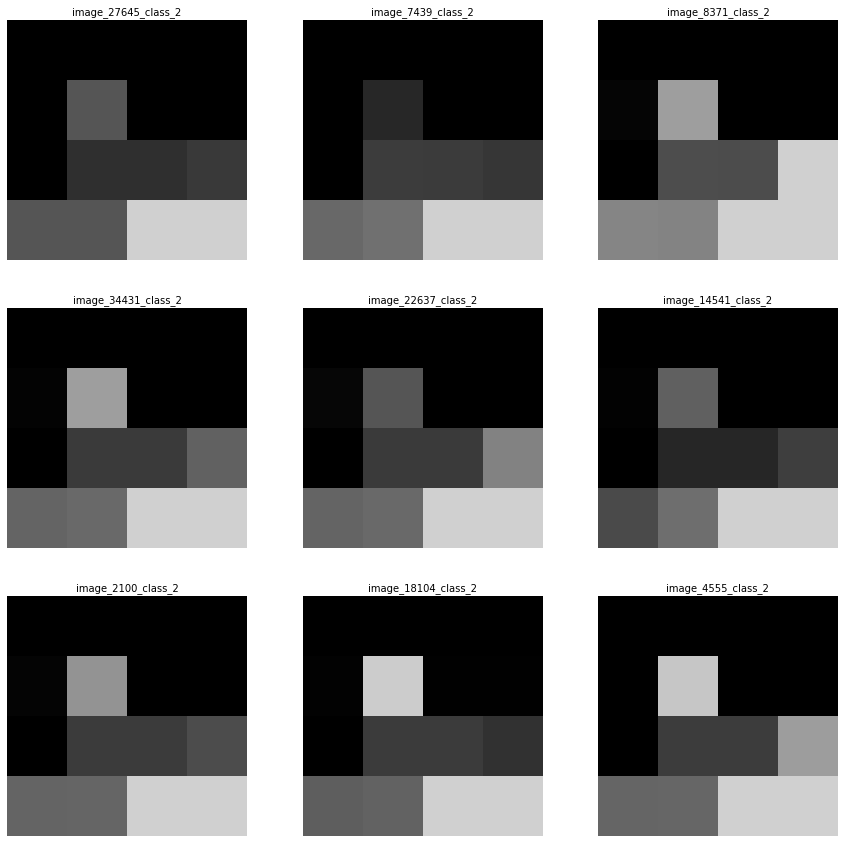

In [393]:
# referenced  nayash / stock_cnn_blog_pub
# examples of what the data looks like as pictures

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()

In [251]:
# we weight the buy / sell data points more due to the abundance of hold
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 0] = 4
sample_weight[y_train == 1] = 4

In [252]:
# referenced  nayash / stock_cnn_blog_pub
# reformat the labels 
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
y_test = one_hot_enc.fit_transform(y_test.reshape(-1, 1))
y_cv = one_hot_enc.fit_transform(y_cv.reshape(-1, 1))

In [253]:
model.fit(x_train, y_train, verbose = 1, shuffle=True, epochs=10,validation_data=(x_cv, y_cv),sample_weight=sample_weight)

Epoch 1/10
1142/1142 [==============================] - 4s 3ms/step - loss: 1.2096 - accuracy: 0.8786 - f1_metric: 0.8567 - val_loss: 0.6487 - val_accuracy: 0.8794 - val_f1_metric: 0.8794
Epoch 2/10
1142/1142 [==============================] - 4s 3ms/step - loss: 1.1511 - accuracy: 0.8789 - f1_metric: 0.8771 - val_loss: 0.5732 - val_accuracy: 0.8794 - val_f1_metric: 0.8794
Epoch 3/10
1142/1142 [==============================] - 4s 3ms/step - loss: 1.1320 - accuracy: 0.8788 - f1_metric: 0.8780 - val_loss: 0.5970 - val_accuracy: 0.8794 - val_f1_metric: 0.8794
Epoch 4/10
1142/1142 [==============================] - 4s 4ms/step - loss: 1.1251 - accuracy: 0.8793 - f1_metric: 0.8793 - val_loss: 0.5904 - val_accuracy: 0.8794 - val_f1_metric: 0.8794
Epoch 5/10
1142/1142 [==============================] - 4s 4ms/step - loss: 1.1198 - accuracy: 0.8794 - f1_metric: 0.8795 - val_loss: 0.5573 - val_accuracy: 0.8794 - val_f1_metric: 0.8794
Epoch 6/10
1142/1142 [==============================] - 4s 3

In [254]:
model.evaluate(x_test, y_test)

357/357 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.8794 - f1_metric: 0.8794


[0.5795637965202332, 0.8794146180152893, 0.8793720602989197]

In [283]:
results = model.predict(x_test)

decisions = [0, 0, 0]
#the model really likes holding due the amount of hold data points, so we probably want to use threshold values
#this code is to test good values

for a in results:
    if a[0] < 0.312 and a[1] < 0.315:
        decisions[2] += 1
    else:
        if a[0] > a[1]:
            decisions[0] += 1
        else:
            decisions[1] += 1
decisions


[0, 2003, 9408]

In [347]:
#format 2021 year data in the same manner as previous years for testing a strategy

csv21 = pd.read_csv('data/21combined.csv', error_bad_lines=False, engine="python")
dates = pd.to_datetime(csv21['Approval Date'])

csv21['year'] = csv21['Approval Date'].str[6:10]
csv21['month'] = csv21['Approval Date'].str[3:5]
csv21['day'] = csv21['Approval Date'].str[0:2]
x = pd.to_datetime(csv21['Approval Date'])
csv21.index = x

names = csv21['Company']

toremove = []

for i in tqdm(range(names.shape[0])):
    found = False
    for key in tickerDict.keys():
        if search(names.iloc[i], key):
            names.iloc[i] = tickerDict[key]
            found = True
            break
    if not found:
        toremove.append(names.iloc[i])

print(names.head())
            
df = pd.concat([csv21['Approval Date'], names], axis=1)
df = df.loc[df["Company"].isin(toremove) == False]
df = df.drop_duplicates()
df.head()

finaldf = pd.DataFrame()
for i in tqdm(range(df.shape[0])):
    if (i != 0):
        try:
            ticker = yf.Ticker(df['Company'].iloc[i])
            hist = ticker.history( start=dates.iloc[i] - dt.timedelta(7*6), end=dates.iloc[i] + dt.timedelta(7*4))
            hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
            hist['TimeToApproval'] = (dates.iloc[i] - hist.index).days
            hist['Labels'] = create_labels(hist, 'Open')
            
            hist.columns = map(str.lower, hist.columns)

            get_SMA(hist, 'open', [9,25])
            get_EMA(hist, 'close', [15])
            get_kst(hist, 'close', [13,18])
            get_RSI_smooth(hist, 'close', [6])
            get_TRIX(hist, 'close', [12, 22])
            get_force_index(hist, [21, 25])
            
            del hist['open' + '_9_sma']
            del hist['open' + '_25_sma']
            
            hist['Company'] = df['Company'].iloc[i]
            hist['Date'] = hist.index
            hist = hist.dropna()
            finaldf = pd.concat([finaldf,hist], ignore_index=True)

        except:
            print("Yfinance error")



c:\users\sukisha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 314: ',' expected after '"'
Skipping line 665: ',' expected after '"'
Skipping line 1018: ',' expected after '"'
Skipping line 1375: ',' expected after '"'
Skipping line 1690: ',' expected after '"'
Skipping line 2100: ',' expected after '"'
Skipping line 2414: ',' expected after '"'
Skipping line 3073: ',' expected after '"'
Skipping line 3691: ',' expected after '"'
Skipping line 4152: ',' expected after '"'
100%|██████████| 4141/4141 [04:00<00:00, 17.21it/s]


Approval Date
2021-10-01                   MYLAN
2021-10-01     HETERO LABS LTD III
2021-10-01     HETERO LABS LTD III
2021-10-01           AMNEAL PHARMS
2021-10-01    AUROBINDO PHARMA LTD
Name: Company, dtype: object


  0%|          | 0/363 [00:00<?, ?it/s]C:\Users\sukisha\AppData\Local\Temp/ipykernel_11248/3338743586.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi_' + str(period)][1:] = res
  3%|▎         | 11/363 [00:02<01:16,  4.62it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 11%|█▏        | 41/363 [00:10<01:08,  4.67it/s]

- ACI.S: No data found, symbol may be delisted
Yfinance error


 14%|█▍        | 51/363 [00:13<01:11,  4.38it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 21%|██▏       | 78/363 [00:20<01:00,  4.68it/s]

- ATH.U: No data found, symbol may be delisted
Yfinance error


 31%|███       | 111/363 [00:28<00:54,  4.60it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 35%|███▍      | 127/363 [00:32<00:51,  4.62it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 40%|███▉      | 145/363 [00:37<00:46,  4.70it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 44%|████▍     | 159/363 [00:41<00:43,  4.64it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 45%|████▌     | 164/363 [00:42<00:43,  4.56it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 47%|████▋     | 171/363 [00:43<00:40,  4.75it/s]

- ATH.U: No data found, symbol may be delisted
Yfinance error


 57%|█████▋    | 206/363 [00:53<00:33,  4.71it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 61%|██████    | 220/363 [00:56<00:30,  4.64it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 61%|██████▏   | 223/363 [00:57<00:27,  5.05it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 66%|██████▌   | 240/363 [01:01<00:28,  4.36it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 67%|██████▋   | 244/363 [01:02<00:24,  4.87it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 85%|████████▍ | 307/363 [01:19<00:12,  4.66it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 90%|█████████ | 327/363 [01:24<00:08,  4.48it/s]

- CEL.P: No data found for this date range, symbol may be delisted
Yfinance error


 94%|█████████▍| 341/363 [01:27<00:04,  4.72it/s]

- OGN: Data doesn't exist for startDate = 1606291200, endDate = 1612339200
Yfinance error


 95%|█████████▌| 346/363 [01:29<00:03,  4.77it/s]

- FNB-E: No data found, symbol may be delisted
Yfinance error


100%|██████████| 363/363 [01:33<00:00,  3.87it/s]

- BAR.W: No data found, symbol may be delisted
Yfinance error


In [351]:
#CHECKPOINT
#2021 test data
finaldf = finaldf.sort_values(by='Date')
finaldf.to_csv('21data.csv')
finaldf

,open,high,low,close,volume,timetoapproval,labels,open_sma_9,open_sma_25,ema_15,kst_13,kst_18,rsi_6,trix_12,trix_22,fi_21,fi_25,Company,Date
9468,102.512929,103.123636,99.325797,99.430763,8272700.0,21,2.0,101.589454,100.636284,101.084770,-6.951089,-7.640854,45.866009,0.189475,0.074699,-6.303749e+06,-6.303749e+06,ABBV,2020-12-14
9063,87.835397,88.642987,87.008574,87.056648,2339100.0,21,2.0,87.762756,86.773348,87.576755,-13.490167,-14.523919,49.085165,0.209033,0.086939,-1.101026e+06,-1.101026e+06,NVS,2020-12-14
9306,58.504226,58.533288,57.884211,57.971401,12233000.0,21,2.0,58.358617,58.011909,58.176296,-16.383626,-16.967327,43.671366,0.074029,0.030842,-9.369968e+05,-9.369968e+05,GILD,2020-12-14
9225,13.435096,13.503097,12.978516,13.289379,103900.0,21,2.0,13.239726,13.089260,13.252275,-11.019881,-11.510086,53.103515,0.203976,0.071270,-1.579018e+03,-1.579018e+03,PKE,2020-12-14
9360,14.570000,14.990000,14.530000,14.580000,268100.0,21,2.0,14.496667,14.628667,14.577942,-47.117545,-47.910038,54.352446,-0.027979,0.000104,6.468387e+03,6.468387e+03,SCPL,2020-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,205.210007,207.350006,203.600006,205.820007,3329300.0,-20,2.0,210.402227,208.224936,208.498035,7.097369,7.615714,27.913469,0.036637,-0.040750,-2.120380e+06,-2.120380e+06,AMGN,2021-11-17
8921,9.860000,9.940000,9.760000,9.780000,2800.0,-19,2.0,9.982222,9.936400,9.935185,-3.014059,-4.025597,31.818181,-0.023915,-0.033868,-4.987175e+02,-4.987175e+02,RBCN,2021-11-17
8891,201.899994,204.389999,199.050003,199.410004,460900.0,-19,2.0,201.711110,194.642798,199.443434,53.805446,54.203361,40.857503,0.267692,0.030723,-4.289452e+05,-4.289452e+05,UTHR,2021-11-17
8861,52.439999,52.439999,51.952000,51.952000,1900.0,-19,2.0,52.591222,52.360840,52.369838,42.711895,44.168715,28.364770,0.161171,0.213702,-5.494883e+02,-5.494883e+02,EQRR,2021-11-17


In [ ]:
finaldf = pd.read_csv('21data.csv', error_bad_lines=False, engine="c")

In [353]:
finaldfdates = finaldf.drop(columns=['Date'], axis=1)
x_21 = mm_scaler.transform(finaldfdates.drop(columns=['labels'], axis=1).drop(columns=['Company'], axis=1))

c:\users\sukisha\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [354]:
x_21 = reshape_as_image(x_21, 4, 4)

In [355]:
x_21 = np.stack((x_21,) * 3, axis=-1)

In [381]:
finaldf.shape

(10251, 19)

In [396]:
#strategy: trade on a stock with only at most 2 buys and one sell using a threshold on the buy/sell indicators given by the model. sell by another threshold on the sell indicator. if we haven't sold by one month after the approval date, sell.
#we allow for fractional amount of stocks, and purcahse $1000 worth of stocks each time. we assume a capital of 10k

import math
capital = 10000
initial = capital
results = model.predict(x_21)
wager = 0.1

decisions = [0, 0, 0]

assets = {}
bought = {}
finalprices = {}

for k in finaldf["Company"]:
    bought[k] = 0

i = 0
for a in results:
    decision = 0
    if a[0] < 0.28 and a[1] < 0.28:
        decisions[2] += 1
        decision = 2
    else:
        if a[0] > a[1]:
            decisions[0] += 1
            decision = 0
        else:
            decisions[1] += 1
            decision = 1
    
    
    
    company = finaldf["Company"].iloc[i]
    
    #if i!= 10251 company not in finaldf["Company"].iloc[i+1,]:
    #    decision = 0
    
    if decision == 0:
        #sell
        if company in assets:
            if assets[company] > 0:
                
                capital += finaldf["close"].iloc[i] * assets[company]
                print("Sold ", assets[company], " ", company, "with time to approval ", finaldf["timetoapproval"].iloc[i], "at ", finaldf["Date"].iloc[i])
                
                assets[company] -= assets[company]
            #else:
             #   print("Can't sell, no stocks")
        #else:
            #print("Can't sell, no stocks")
    elif decision == 1:
        #buy
        if math.floor(wager * initial / finaldf["close"].iloc[i]) * finaldf["close"].iloc[i]  < capital and bought[company] < 2:
            
            
            num = math.floor(wager * initial / finaldf["close"].iloc[i])
            capital -= finaldf["close"].iloc[i] * num
            if (capital < 0):
                print("ERROR")
            if company in assets:
                assets[company] += num
            else:
                assets[company] = num
            print("Bought ", num, " ", company, "with time to approval ", finaldf["timetoapproval"].iloc[i], "at ", finaldf["Date"].iloc[i])
            if num != 0:
                bought[company] += 1
            
    finalprices[company] = finaldf["close"].iloc[i]
    i += 1
    
print(assets)

profit = capital - initial

for k in assets:
    profit += assets[k] * finalprices[k]
profit

Bought  46   GOLD with time to approval  21 at  2020-12-14 00:00:00
Bought  26   PFE with time to approval  21 at  2020-12-15 00:00:00
Bought  26   PFE with time to approval  20 at  2020-12-15 00:00:00
Bought  11   NVS with time to approval  20 at  2020-12-15 00:00:00
Bought  10   ABBV with time to approval  20 at  2020-12-15 00:00:00
Bought  10   ABBV with time to approval  20 at  2020-12-15 00:00:00
Bought  17   GILD with time to approval  20 at  2020-12-15 00:00:00
Bought  17   GILD with time to approval  21 at  2020-12-15 00:00:00
Bought  225   ACOR with time to approval  21 at  2020-12-16 00:00:00
Bought  13   MRK with time to approval  21 at  2020-12-16 00:00:00
Sold  13   MRK with time to approval  8 at  2020-12-29 00:00:00
Bought  45   GOLD with time to approval  8 at  2020-12-29 00:00:00
Sold  20   ABBV with time to approval  4 at  2020-12-31 00:00:00
Bought  26   CTVA with time to approval  6 at  2020-12-31 00:00:00
Sold  11   NVS with time to approval  6 at  2020-12-31 00:00

3070.51966047287